# Titanic: Machine Learning from Disaster

## Start here! Predict survival on the Titanic and get familiar with ML basics

### Start here if
You're new to data science and machine learning, or looking for a simple intro to the Kaggle prediction competitions.

### Competition Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Practice Skills
Binary classification
Python and R basics

### Data

#### Overview
The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Carga de los datos

In [21]:
# Importamos las librerías para el tratamiento de los dataframe
import pandas as pd

# Librería para la visualización gráfica y cálculos
import matplotlib.pyplot as plt

In [6]:
# Guardamos los datos en 3 variables diferentes
gender = pd.read_csv("gender_submission.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [9]:
# Realizamos una observación de las tres tablas con la función shape()
print("La tabla gender tiene {} observaciones y {} variables".format(gender.shape[0],gender.shape[1]))
print("La tabla train tiene {} observaciones y {} variables".format(train.shape[0],train.shape[1]))
print("La tabla test tiene {} observaciones y {} variables".format(test.shape[0],test.shape[1]))

La tabla gender tiene 418 observaciones y 2 variables
La tabla train tiene 891 observaciones y 12 variables
La tabla test tiene 418 observaciones y 11 variables


In [ ]:
# Veamos estas observaciones y variables, pero de forma resumida con la función head() y las 10 primeras filas

In [12]:
# Observamos primero gender
gender.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [14]:
# Seguimos con train
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [16]:
# Y con test
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## EDA (Exploratory Data Analysis)

In [19]:
# Realizamos ahora la observación de las variables numéricas del nuestro dataframe train con describe()
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Se puede observar como todas las variables numéricas tenemos la __media__, __desviación estandar__, y los diferentes percentiles __25%,50%,75%__ además del __mínimo y máximo__.

Nos llama la anteción que de las 891 observaciones, la variable _age_ tiene solo 714, el resto valores nulos o ceros a tener en cuenta para los demás cálculos.

In [22]:
# Para realizar un cálculo para las demás variables categóricas realizamos otro tipo de operación
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pears, Mrs. Thomas (Edith Wearne)",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


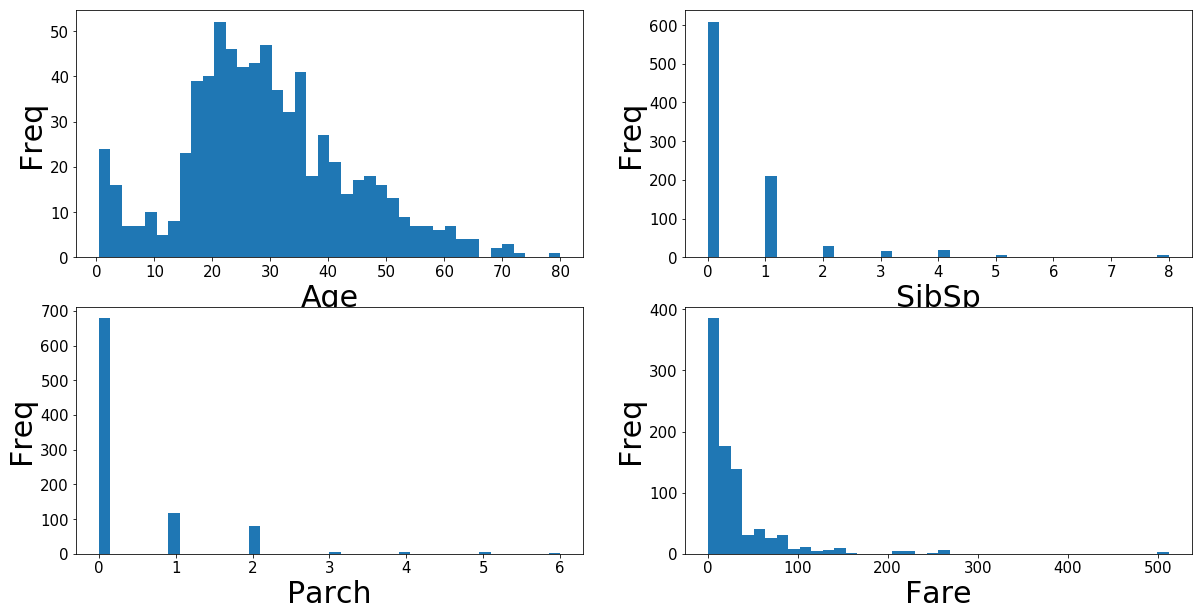

In [30]:
# Para una mejor interpretación de los datos realizamos una representación gráfica
# Creamos la estructura de los histogramas
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

# Creamos subplot
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Especificamos las variables
num_variables = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_variables
yaxes = ['Freq','Freq','Freq','Freq']

# Dibujamos los histogramas
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(train[num_variables[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize = 30)
    ax.set_ylabel(yaxes[idx], fontsize = 30)
    ax.tick_params(axis='both', labelsize=15)

Con una representación gráfica se pueden apreciar mejor los valores numéricos de las tablas anteriores. Podemos decir que la mayoría de los pasajeros son de edad entre 20 y 30 años. Que no tiene parentesco y que el precio promedio está situado en menos de 50 dolares. Los Outliers en cada una de las cuatros variables se pueden visualizar también como valores muy extremos. 

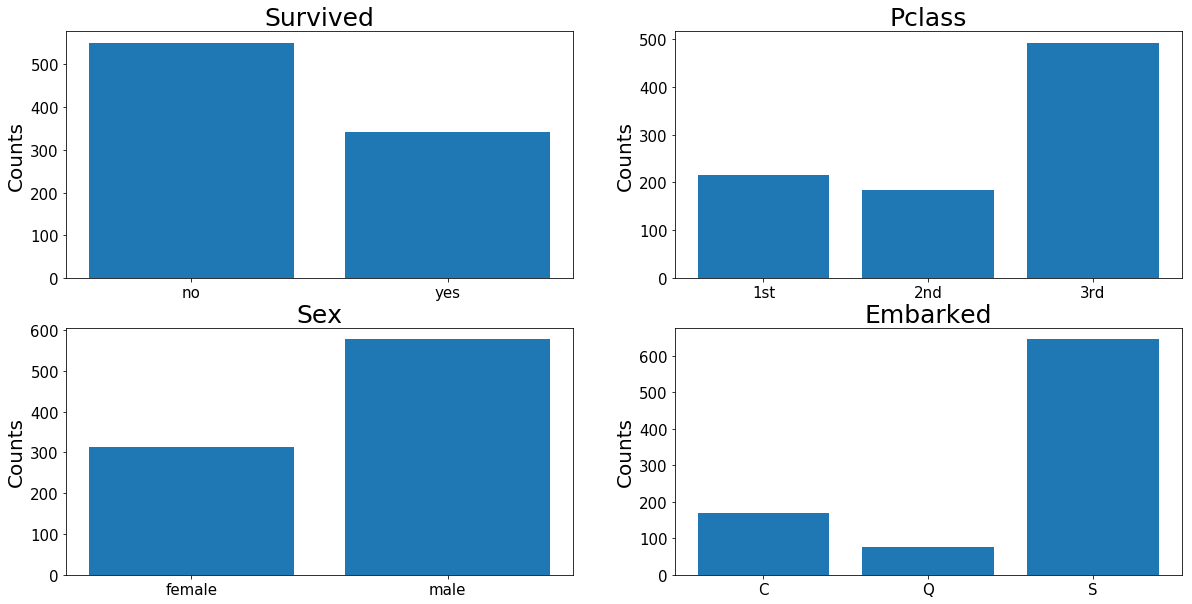

In [45]:
# Visualización de las variables categóricas
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

# creamos los subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Survived = train.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = train.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Pclass = train.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = train.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = train.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = train.groupby('Sex').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Embarked = train.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = train.groupby('Embarked').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

### Existe una correlación entre las variables numéricas?

Para dar un sentido as las variables numéricas, averiguamos si existe una correlación, para ello crearemos la visualización según el criterio de Pearson

/Users/marcusrb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


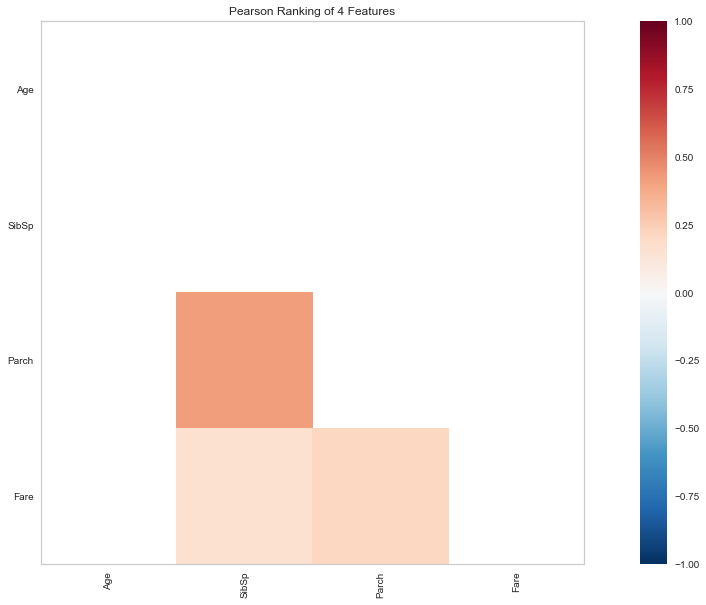

In [50]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = train[num_variables].as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_variables, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

Con esta visualización de correlaciones, se puede observar una correlación del 0,25 y 0,50 entre las variables de parentesco y su tarifa.